# Example of using Shapefiles
I learned this by reading through the webpages linked in the comments throughout this

Please do reach out if you have any questions about plotting with these!

-Jim Davenport

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# from: https://github.com/GeospatialPython/pyshp
# install via "pip install pyshp"
import shapefile

398 shapes


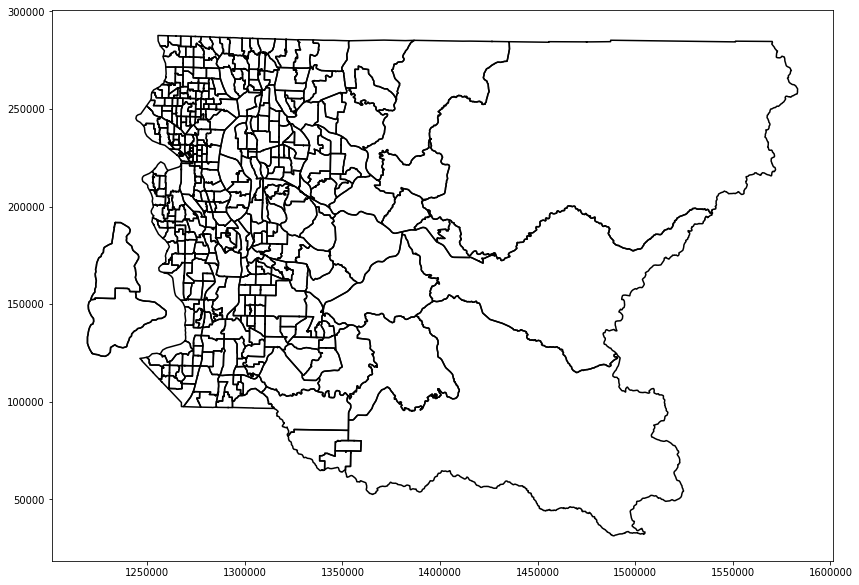

In [81]:
# from: https://www.seattle.gov/Documents/Departments/OPCD/Demographics/GeographicFilesandMaps/KingCountyTractsShapefiles.zip
sf = shapefile.Reader('../KingCountyTractsShapefiles/kc_tract_10.shp')

print(str(len(sf.shapes())) + " shapes")

# from: https://chrishavlin.wordpress.com/2016/11/16/shapefiles-tutorial/
plt.figure(figsize=(14,14))
ax = plt.axes() # add the axes
ax.set_aspect('equal')

for shape in list(sf.iterShapes()):
    npoints=len(shape.points) # total points
    nparts = len(shape.parts) # total parts

    if nparts == 1:
        x_lon = np.zeros((len(shape.points),1))
        y_lat = np.zeros((len(shape.points),1))
        for ip in range(len(shape.points)):
            x_lon[ip] = shape.points[ip][0]
            y_lat[ip] = shape.points[ip][1]
        plt.plot(x_lon, y_lat, c='k')

    else: # loop over parts of each shape, plot separately
        for ip in range(nparts): # loop over parts, plot separately
            i0=shape.parts[ip]
            if ip < nparts-1:
                i1 = shape.parts[ip+1]-1
            else:
                i1 = npoints

        seg=shape.points[i0:i1+1]
        x_lon = np.zeros((len(seg),1))
        y_lat = np.zeros((len(seg),1))
        for ip in range(len(seg)):
            x_lon[ip] = seg[ip][0]
            y_lat[ip] = seg[ip][1]

        plt.plot(x_lon, y_lat, c='k')


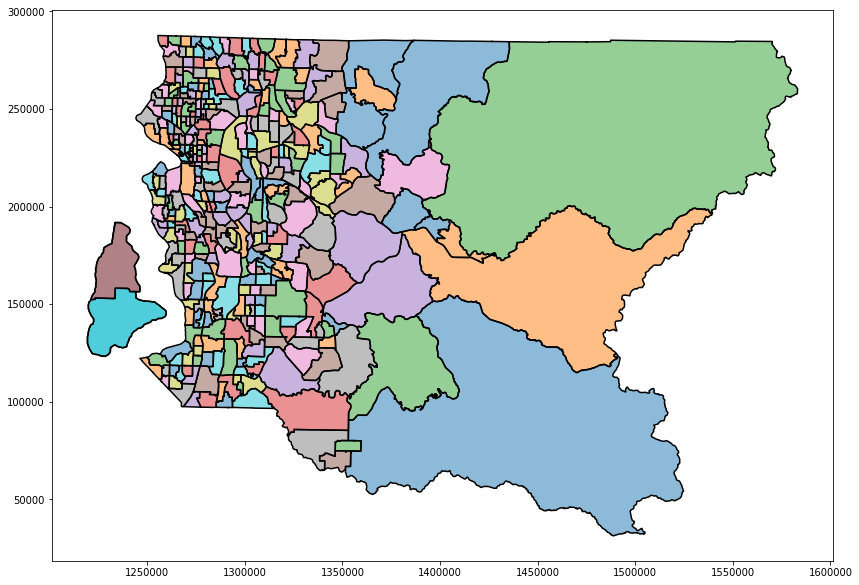

In [82]:
plt.figure(figsize=(14,14))
ax = plt.axes() # add the axes
ax.set_aspect('equal')

for shape in list(sf.iterShapes()):
    npoints=len(shape.points) # total points
    nparts = len(shape.parts) # total parts

    if nparts == 1:
        x_lon = np.zeros((len(shape.points),1))
        y_lat = np.zeros((len(shape.points),1))
        for ip in range(len(shape.points)):
            x_lon[ip] = shape.points[ip][0]
            y_lat[ip] = shape.points[ip][1]
            
        plt.plot(x_lon, y_lat, c='k')
        plt.fill(x_lon, y_lat, alpha=0.5)

    else: # loop over parts of each shape, plot separately
        for ip in range(nparts): # loop over parts, plot separately
            i0=shape.parts[ip]
            if ip < nparts-1:
                i1 = shape.parts[ip+1]-1
            else:
                i1 = npoints

        seg=shape.points[i0:i1+1]
        x_lon = np.zeros((len(seg),1))
        y_lat = np.zeros((len(seg),1))
        for ip in range(len(seg)):
            x_lon[ip] = seg[ip][0]
            y_lat[ip] = seg[ip][1]

        plt.plot(x_lon, y_lat, c='k')
        plt.fill(x_lon, y_lat, alpha=0.5)



## NOTE:
the units for this map are... wtf. They are in "linear feet" from a central point (according to the note on the website I downloaded them from), and I don't quite know what it is.

You could find the middle of this map, subtract it off, and convert it to miles or km or something useful!

Text(0.5,1,'King County, US 2010 Census Tracts')

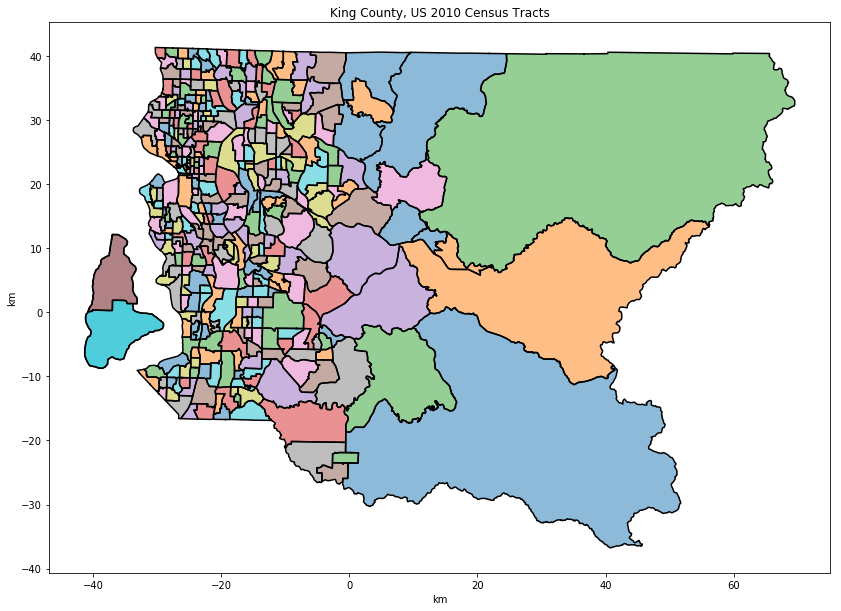

In [85]:
# let's eyeball a middle
x0 = 1355000
y0 = 152000

ft_to_km = 0.0003048 # accroding to Google

plt.figure(figsize=(14,14))
ax = plt.axes() # add the axes
ax.set_aspect('equal')

for shape in list(sf.iterShapes()):
    npoints=len(shape.points) # total points
    nparts = len(shape.parts) # total parts

    if nparts == 1:
        x_lon = np.zeros((len(shape.points),1))
        y_lat = np.zeros((len(shape.points),1))
        for ip in range(len(shape.points)):
            x_lon[ip] = shape.points[ip][0]
            y_lat[ip] = shape.points[ip][1]
            
        plt.plot((x_lon - x0)*ft_to_km, (y_lat - y0)*ft_to_km, c='k')
        plt.fill((x_lon - x0)*ft_to_km, (y_lat - y0)*ft_to_km, alpha=0.5)

    else: # loop over parts of each shape, plot separately
        for ip in range(nparts): # loop over parts, plot separately
            i0=shape.parts[ip]
            if ip < nparts-1:
                i1 = shape.parts[ip+1]-1
            else:
                i1 = npoints

        seg=shape.points[i0:i1+1]
        x_lon = np.zeros((len(seg),1))
        y_lat = np.zeros((len(seg),1))
        for ip in range(len(seg)):
            x_lon[ip] = seg[ip][0]
            y_lat[ip] = seg[ip][1]

        plt.plot((x_lon - x0)*ft_to_km, (y_lat - y0)*ft_to_km, c='k')
        plt.fill((x_lon - x0)*ft_to_km, (y_lat - y0)*ft_to_km, alpha=0.5)

plt.xlabel('km')
plt.ylabel('km')
plt.title('King County, US 2010 Census Tracts')

In [ ]:
# a neat file to connect Census blocks into Neighborhoods!
# from this page: https://www.seattle.gov/opcd/population-and-demographics/geographic-files-and-maps#2010census
# https://www.seattle.gov/Documents/Departments/OPCD/Demographics/GeographicFilesandMaps/SeattleCensusBlocksandNeighborhoodCorrelationFile.xlsx

1458 shapes


Text(0.5,1,'WA, US 2010 Census Tracts')

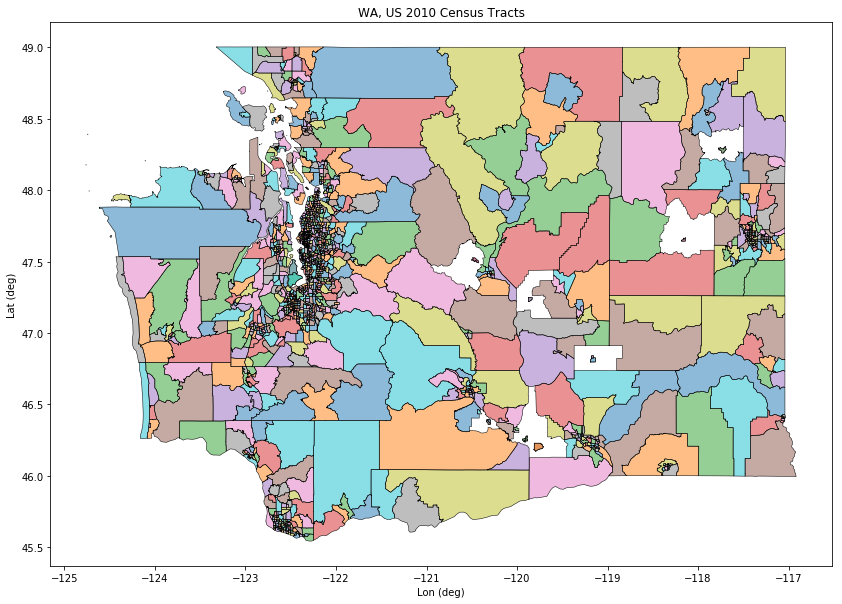

In [87]:
# from: https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2017&layergroup=Census+Tracts
sf = shapefile.Reader('../tl_2017_53_tract/tl_2017_53_tract.shp')

print(str(len(sf.shapes())) + " shapes")

# from: https://chrishavlin.wordpress.com/2016/11/16/shapefiles-tutorial/
plt.figure(figsize=(14,10))
ax = plt.axes() # add the axes
ax.set_aspect('auto')

for shape in list(sf.iterShapes()):
    npoints=len(shape.points) # total points
    nparts = len(shape.parts) # total parts

    if nparts == 1:
        x_lon = np.zeros((len(shape.points),1))
        y_lat = np.zeros((len(shape.points),1))
        for ip in range(len(shape.points)):
            x_lon[ip] = shape.points[ip][0]
            y_lat[ip] = shape.points[ip][1]
        plt.plot(x_lon, y_lat, c='k', lw=0.5)
        plt.fill(x_lon, y_lat, alpha=0.5)

    else: # loop over parts of each shape, plot separately
        for ip in range(nparts): # loop over parts, plot separately
            i0=shape.parts[ip]
            if ip < nparts-1:
                i1 = shape.parts[ip+1]-1
            else:
                i1 = npoints

        seg=shape.points[i0:i1+1]
        x_lon = np.zeros((len(seg),1))
        y_lat = np.zeros((len(seg),1))
        for ip in range(len(seg)):
            x_lon[ip] = seg[ip][0]
            y_lat[ip] = seg[ip][1]

        plt.plot(x_lon, y_lat, c='k', lw=0.5)
        plt.fill(x_lon, y_lat, alpha=0.5)

plt.xlabel('Lon (deg)')
plt.ylabel('Lat (deg)')
plt.title('WA, US 2010 Census Tracts')